## U.S. Treasury Yields — Exploratory Time-Series Analysis

This notebook examines U.S. Treasury yields using data from the Federal Reserve Bank of St. Louis (FRED).
It builds on the prior gold reserves brief by applying the same descriptive macroeconomic workflow.


In [13]:
# Packages 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sn
from pathlib import Path 


<h3><center>Data Preparation</h3></center>

In [14]:
DATA_DIR = Path("..") / "datasets"
dgs10 = pd.read_csv(DATA_DIR / "DGS10.csv")
dgs2 = pd.read_csv(DATA_DIR/ "DGS2.csv")


# Convert to datetime
dgs10["observation_date"] = pd.to_datetime(dgs10["observation_date"])
dgs2["observation_date"]  = pd.to_datetime(dgs2["observation_date"])

# Convert values to numeric (handles '.' / missing)
dgs10["DGS10"] = pd.to_numeric(dgs10["DGS10"], errors="coerce")
dgs2["DGS2"]   = pd.to_numeric(dgs2["DGS2"], errors="coerce")


In [15]:
yields = pd.merge(dgs10, dgs2, on="observation_date", how="inner")
yields["spread_10y_2y"] = yields["DGS10"] - yields["DGS2"]
yields["year"] = yields["observation_date"].dt.year


In [16]:
yearly_spread = (
    yields.groupby("year")["spread_10y_2y"]
    .mean()
    .reset_index()
)


                                    ### Data Visualisation

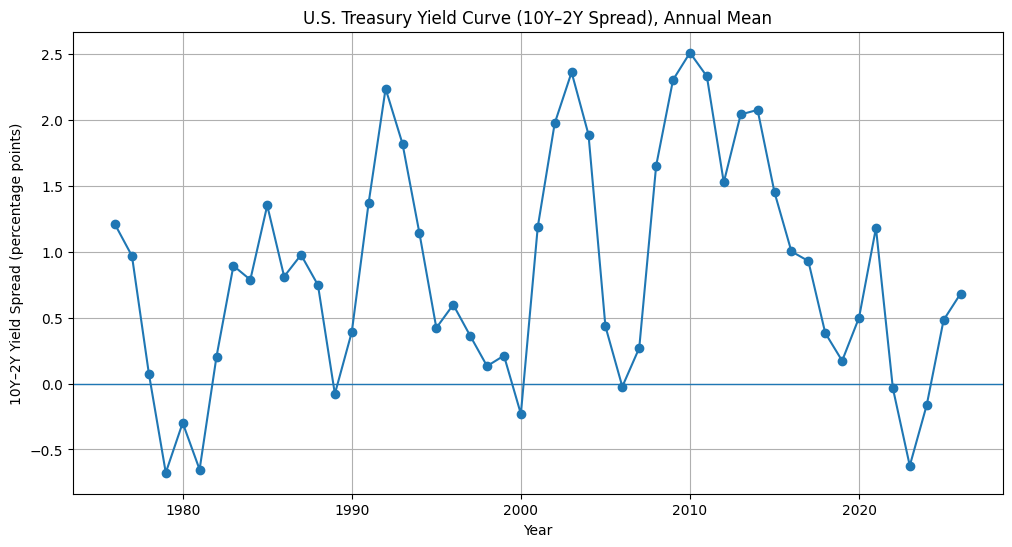

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_spread["year"], yearly_spread["spread_10y_2y"], marker="o")
plt.axhline(0, linewidth=1)
plt.xlabel("Year")
plt.ylabel("10Y–2Y Yield Spread (percentage points)")
plt.title("U.S. Treasury Yield Curve (10Y–2Y Spread), Annual Mean")
plt.grid(True)
plt.savefig("treasury_yields_10Y-2Y.png", dpi=300, bbox_inches="tight")
plt.show()




<h4><center>Research Questions</h4></center>

<center>RQ1: How did the U.S. Treasury 10Y–2Y yield spread change between 2015 and 2025? </center>

<center>RQ2: When did the yield curve invert, and how persistent were inversion periods during this time </center>

                                    ## Data Interpretation 
<ol>
Early period (1970s–1980s): high volatility and repeated inversions
Mid period (1990s–2000s): elevated spreads with episodic inversions
Recent period (2010s–2020s): flatter curve and more frequent inversions
</ol>

The 10Y–2Y yield spread narrows and turns negative during the 1976–1980 period, indicating episodes of yield curve inversion. This pattern is consistent with periods of heightened macroeconomic uncertainty, though the analysis remains descriptive. During the 1981–1989 period, the yield curve widens substantially, reflecting a re-steepening following earlier inversions. From 1990 to 2000, the spread remains elevated, averaging approximately 2.3–2.4 percentage points during a largely expansionary period. In the post–Global Financial Crisis era (2010–2019), the yield curve flattens relative to earlier decades, indicating a more compressed term structure of interest rates. The yield spread declines sharply and enters inversion during the late 2010s and early 2020s, with brief periods of widening thereafter. While these movements coincide temporally with the COVID-19 pandemic, this analysis remains descriptive and does not attribute causality to the pandemic itself.


<h3><center>Source Citation(s)</center></h3>
<p><center>1. Board of Governors of the Federal Reserve System (US), Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis [DGS10], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DGS10, February 5, 2026.</p></center>